# Capstone week 1 data exploring

**This note book is mainly used for the Capstone Project**

In [76]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data-Collisions.csv")
print("Database loaded successfully!")

Database loaded successfully!


/home/wg/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Find NaN columns

(194673, 38)
Columns and numver of NaN: X                   5334
Y                   5334
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
dtype: int64


Text(0.5, 0, 'Attributes')

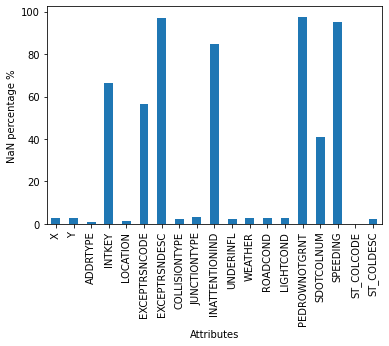

In [77]:
import matplotlib.pylab as plt
# print(df.info())
# print(df["ROADCOND"].isnull().sum())

#==========
# find columns with NaN
print(df.shape)
columns_with_nan = df.columns[df.isnull().any()].tolist()
num_of_na = df[columns_with_nan].isnull().sum()
print("Columns and numver of NaN:", num_of_na)
na_percentage = num_of_na/df.shape[0]*100
na_percentage.plot.bar()
plt.ylabel("NaN percentage %")
plt.xlabel("Attributes")

### Drop columns with NaN > 30%

In [78]:
columns_tobe_cleaned = df.columns[df.isnull().sum()/df.shape[0] > 0.3].tolist() #columns with >30% NAN
print("Columns with >30% NaN:", columns_tobe_cleaned)

Columns with >30% NaN: ['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING']


### Analysis to drop other un-related columns

Correlation between SEVERITYCODE and SEVERITYCODE.1:  1.0
Correlation between SEVERITYCODE and SEVERITYDESC:  1.0
Number of NaN in PEDCOUNT: 0
Number of NaN in PEDCYLCOUNT: 0
Correlation between PEDCOUNT and SEVERITYCODE: 0.24633815772800408
Correlation between PEDCYLCOUNT and SEVERITYCODE: 0.2142181827157247
SEGLANEKEY corr SEVERITYCODE:  0.15390671428361585
CROSSWALKEY corr SEVERITYCODE:  0.18231445527038512


<ipython-input-123-577723ea8a7a>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg_key[seg_key>1]=1
<ipython-input-123-577723ea8a7a>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cross_key[cross_key>1]=1


['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'X', 'Y', 'OBJECTID', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC', 'PEDCOUNT', 'PEDCYLCOUNT', 'SEGLANEKEY', 'CROSSWALKKEY', 'INCDATE', 'INCDTTM', 'UNDERINFL', 'X', 'Y', 'OBJECTID', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC', 'PEDCOUNT', 'PEDCYLCOUNT', 'SEGLANEKEY', 'CROSSWALKKEY', 'INCDATE', 'INCDTTM', 'UNDERINFL', 'X', 'Y', 'OBJECTID', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC', 'PEDCOUNT', 'PEDCYLCOUNT', 'SEGLANEKEY', 'CROSSWALKKEY', 'INCDATE', 'INCDTTM', 'UNDERINFL', 'X', 'Y', 'OBJECTID', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC', 'PEDCOUNT', 'PEDCYLCOUNT', 'SEGLANEKEY', 'CROS

<ipython-input-123-577723ea8a7a>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeding_yes_no[pd.isnull(speeding_yes_no)] = "N"


<Figure size 432x288 with 0 Axes>

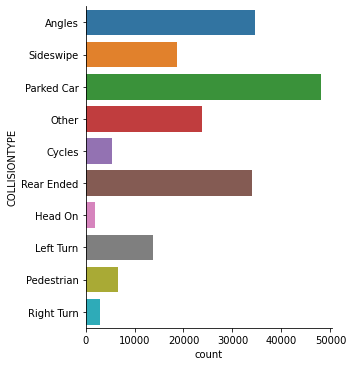

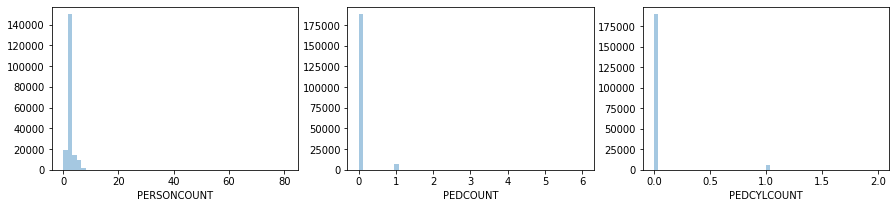

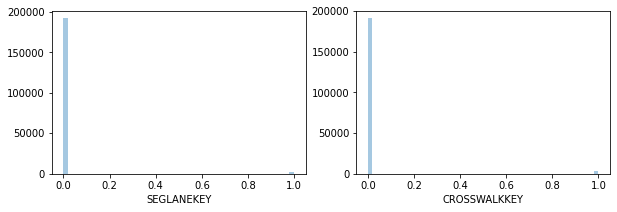

<Figure size 432x288 with 0 Axes>

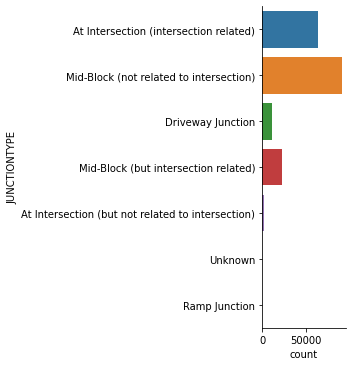

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# drop the columns with more than 30% NaN
# df.drop(columns_tobe_cleaned, axis=1)
# "SEVERITYCODE.1" is the same as the label, need to be removed
# SDOT_COLDESC is the description of the SDOT_COLCODE, which is redandent, need to be removed
# SDOTCOLNUM is not meaningful numbers, removed
# PEDROWNOTGRNT not realted to severity, removed
# "ST_COLDESC" is the description of ST_COLCODE, removed
# PEDCOUNT and PEDCYLCOUNT is only two value, and not evenly distributed, 
#NOT strongly correlated with severity code removed
# INATTENTIONIND, INATTENTIONIND, meaningless, removed
# fill nan of SPEEDING TO "N" and drop the original column SPEEDING

#print(df.info())


print("Correlation between SEVERITYCODE and SEVERITYCODE.1: ", df["SEVERITYCODE"].corr(df["SEVERITYCODE.1"]))
severity_desc = pd.get_dummies(df["SEVERITYDESC"])
print("Correlation between SEVERITYCODE and SEVERITYDESC: ", df["SEVERITYCODE"].corr(severity_desc["Injury Collision"]))


plt.figure()
sns.catplot(y="COLLISIONTYPE", kind="count", data=df)

plt.figure(figsize=[15, 3])
plt.subplot(1, 3, 1)
sns.distplot(df["PERSONCOUNT"], kde=False)
# plt.xlim([0, 10])
plt.subplot(1, 3, 2)
sns.distplot(df["PEDCOUNT"], kde=False)
plt.subplot(1, 3, 3)
sns.distplot(df["PEDCYLCOUNT"], kde=False)


print("Number of NaN in PEDCOUNT:", df["PEDCOUNT"].isnull().sum())
print("Number of NaN in PEDCYLCOUNT:", df["PEDCYLCOUNT"].isnull().sum())
print("Correlation between PEDCOUNT and SEVERITYCODE:", df["PEDCOUNT"].corr(df["SEVERITYCODE"]))
print("Correlation between PEDCYLCOUNT and SEVERITYCODE:", df["PEDCYLCOUNT"].corr(df["SEVERITYCODE"]))

plt.figure(figsize=[10, 3])
plt.subplot(1, 2,1)
sns.distplot(df["SEGLANEKEY"], kde=False)
plt.subplot(1, 2, 2)
sns.distplot(df["CROSSWALKKEY"], kde=False)
seg_key = df["SEGLANEKEY"]
seg_key[seg_key>1]=1
cross_key = df["CROSSWALKKEY"]
cross_key[cross_key>1]=1
print("SEGLANEKEY corr SEVERITYCODE: ", df["SEVERITYCODE"].corr(seg_key))
print("CROSSWALKEY corr SEVERITYCODE: ", df["SEVERITYCODE"].corr(cross_key))

plt.figure()
sns.catplot(y="JUNCTIONTYPE", kind="count", data=df)


columns_tobe_cleaned += ["X", "Y", "OBJECTID", "COLDETKEY", "REPORTNO",\
                         "STATUS", "INTKEY", "LOCATION", "SEVERITYCODE.1", \
                         "SEVERITYDESC", "SDOT_COLDESC", "ST_COLDESC", "PEDCOUNT", \
                         "PEDCYLCOUNT", "SEGLANEKEY", "CROSSWALKKEY", "INCDATE", \
                         "INCDTTM", "UNDERINFL"]

print(columns_tobe_cleaned)

speeding_yes_no = df["SPEEDING"]
speeding_yes_no[pd.isnull(speeding_yes_no)] = "N"
df["SPEEDING_YES_NO"] = speeding_yes_no




### Initial data drop

In [132]:
df_cleaned = df.drop(labels = columns_tobe_cleaned, axis=1)

### Test address type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SEVERITYCODE     194673 non-null  int64 
 1   INCKEY           194673 non-null  int64 
 2   ADDRTYPE         192747 non-null  object
 3   COLLISIONTYPE    189769 non-null  object
 4   PERSONCOUNT      194673 non-null  int64 
 5   VEHCOUNT         194673 non-null  int64 
 6   JUNCTIONTYPE     188344 non-null  object
 7   SDOT_COLCODE     194673 non-null  int64 
 8   WEATHER          189592 non-null  object
 9   ROADCOND         189661 non-null  object
 10  LIGHTCOND        189503 non-null  object
 11  ST_COLCODE       194655 non-null  object
 12  HITPARKEDCAR     194673 non-null  object
 13  SPEEDING_YES_NO  194673 non-null  object
dtypes: int64(5), object(9)
memory usage: 20.8+ MB
None
(194673, 14)


<Figure size 432x288 with 0 Axes>

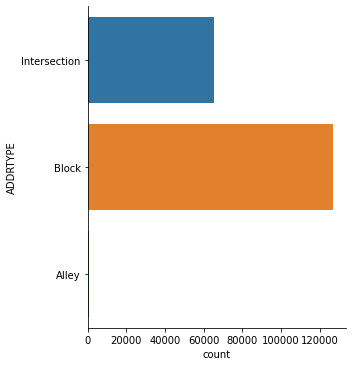

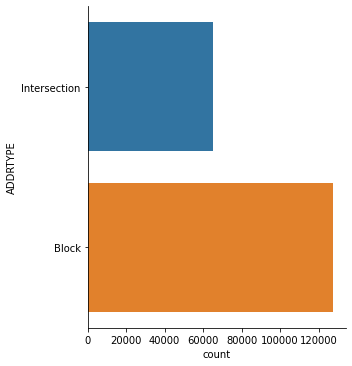

In [124]:
print(df_cleaned.info())
print(df_cleaned.shape)
further_drop = ["INCKEY", "JUNCTIONTYPE"]

# Test Address type
plt.figure()
sns.catplot(y="ADDRTYPE", kind="count", data=df_cleaned)
df_cleaned["ADDRTYPE"].replace("Alley", "Block", inplace=True) # replace Alley with Block to simplify the attributes.
address_type = pd.get_dummies(df_cleaned["ADDRTYPE"]) #keep this one
sns.catplot(y="ADDRTYPE", kind="count", data=df_cleaned)

### Test vehicle count


<AxesSubplot:xlabel='VEHCOUNT'>

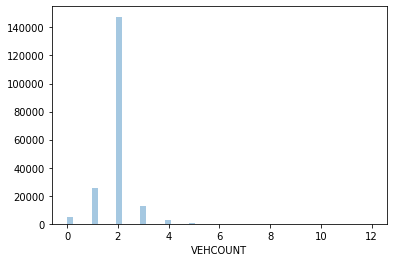

In [125]:
# Test vehicle count
plt.figure()
sns.distplot(df_cleaned["VEHCOUNT"], kde=False) # keep this one


### Test junction type

In [ ]:
# Test junction type
plt.figure()
sns.catplot(y="JUNCTIONTYPE", kind="count", data=df_cleaned) # Drop this one. It looks like junction type is not directly related to the seveirity

### Test SDOT_COLCODE

/home/wg/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


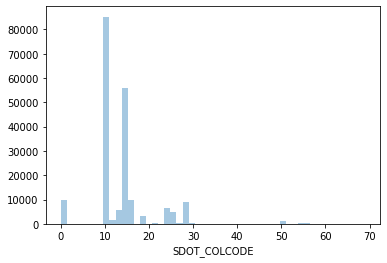

<Figure size 432x288 with 0 Axes>

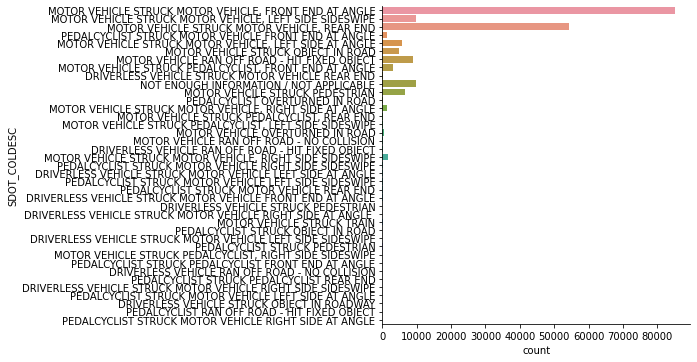

In [126]:

# Tests of SDOT_COLCODE
plt.figure()
sns.distplot(df_cleaned["SDOT_COLCODE"],  kde=False) # keep this one. eg. MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END
plt.figure()
sns.catplot(y="SDOT_COLDESC", kind="count", data=df) # drop this one

### Test weather

<Figure size 432x288 with 0 Axes>

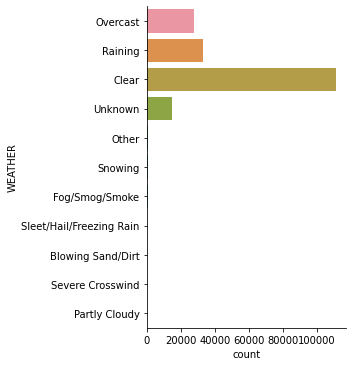

In [127]:
# Test weather
plt.figure()
sns.catplot(y="WEATHER", kind="count", data = df_cleaned) #drop, this will be reflected on road condition

### Test road condition

Original data count: 
 Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
After mergine data count: 
 Dry    139795
Wet     49866
Name: ROADCOND, dtype: int64


<Figure size 432x288 with 0 Axes>

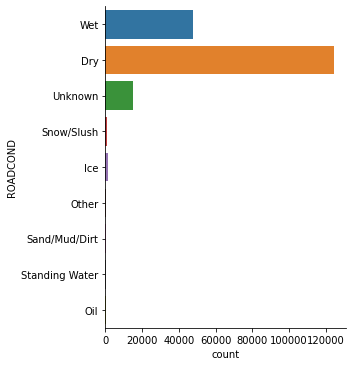

<Figure size 432x288 with 0 Axes>

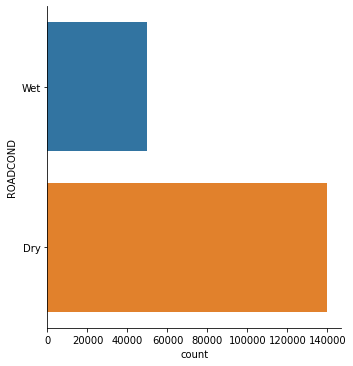

In [133]:
# Test road condition
plt.figure()
sns.catplot(y="ROADCOND", kind="count", data=df_cleaned)
print("Original data count: \n", df_cleaned["ROADCOND"].value_counts())
dry_group = ["Unknown", "Other", "Sand/Mud/Dirt"]
wet_group = ["Ice", "Snow/Slush", "Standing Water", "Oil"]
for dd in dry_group:
    df_cleaned["ROADCOND"].replace(dd, "Dry",inplace=True)
for ww in wet_group:
    df_cleaned["ROADCOND"].replace(ww, "Wet",inplace=True)
plt.figure()
sns.catplot(y="ROADCOND", kind="count", data=df_cleaned)
print("After mergine data count: \n", df_cleaned["ROADCOND"].value_counts())

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


<Figure size 432x288 with 0 Axes>

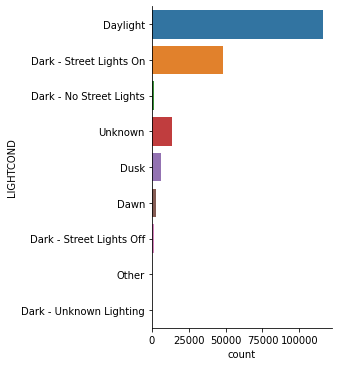

In [134]:
# Test LIGHTCOND
plt.figure()
sns.catplot(y="LIGHTCOND", kind="count", data=df_cleaned)
print(df_cleaned["LIGHTCOND"].value_counts())
daylight_group = [""]